## Logistic回归的一般过程
### （1）收集数据：采用任意方法收集数据
### （2）准备数据：由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳
### （3）分析数据：采用任意方法对数据进行分析
### （4）训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数。
### （5）测试算法：一旦训练步骤完成，分类将会很快
### （6）使用算法：首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数 就可以对这些数值进行简单的回归计算，判断他们属于哪个类别，在这之后，我们就可以在输出的类别上做一些其他分析工作

### 标称型：标称型目标变量的结果只在有限目标集中取值，如真与假(标称型目标变量主要用于分类）

### 数值型：数值型目标变量则可以从无限的数值集合中取值，如0.100，42.001等 
### (数值型目标变量主要用于回归分析)

####  每个回归系数初始化为1
####  重复R次：
#### &emsp;&emsp; &emsp;&emsp; 计算整个数据集的梯度
#### &emsp;&emsp; &emsp;&emsp; 使用alpha * gradient更新回归系数的向量
#### 返回回归系数

## 程序清单5-1 Logistic回归梯度上升优化算法

In [2]:
from numpy import *
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat
        

In [3]:
dataMat,labelMat=loadDataSet()
print(dataMat)
print(labelMat)

[[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743], [1.0, 0.850433, 6.920334], [1.0, 1.347183, 13.1755], [1.0, 1.176813, 3.16702], [1.0, -1.781871, 9.097953], [1.0, -0.566606, 5.749003], [1.0, 0.931635, 1.589505], [1.0, -0.024205, 6.151823], [1.0, -0.036453, 2.690988], [1.0, -0.196949, 0.444165], [1.0, 1.014459, 5.754399], [1.0, 1.985298, 3.230619], [1.0, -1.693453, -0.55754], [1.0, -0.576525, 11.778922], [1.0, -0.346811, -1.67873], [1.0, -2.124484, 2.672471], [1.0, 1.217916, 9.597015], [1.0, -0.733928, 9.098687], [1.0, -3.642001, -1.618087], [1.0, 0.315985, 3.523953], [1.0, 1.416614, 9.619232], [1.0, -0.386323, 3.989286], [1.0, 0.556921, 8.294984], [1.0, 1.224863, 11.58736], [1.0, -1.347803, -2.406051], [1.0, 1.196604, 4.951851], [1.0, 0.275221, 9.543647], [1.0,

In [4]:
def sigmoid(intX):
    return 1.0/(1+exp(-intX))

In [5]:
def gradAscent(dataMatIn,classLabels):
    dataMatrix = mat(dataMatIn)   #转换为numpy内置的矩阵格式
    labelMat = mat(classLabels).transpose()   #transpose()是转置的作用
    m,n = shape(dataMatrix)    #(100,3)#返回矩阵行跟列数100，3
    print(dataMatrix)
    print(labelMat)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))#[1,1,1]T这个权重可能随便给一个初始值
    print(weights)
    for k in range(maxCycles):
        #sigmoid函数的分类结果
        h = sigmoid(dataMatrix * weights)
        print('hhhhhhhhh')
        print(h)
        error = (labelMat - h)
        #真实与预测的误差
        print('eeeeeeeee')
        print(error)
        weights = weights + alpha * dataMatrix.transpose()*error
        #用误差乘以数据矩阵的转置表示梯度，此包含一个数学推导
        print('wwwwwwwwww')
        print(weights)
    return weights 
    
dataArr,labelMat = loadDataSet()
weights=gradAscent(dataArr,labelMat)

[[  1.00000000e+00  -1.76120000e-02   1.40530640e+01]
 [  1.00000000e+00  -1.39563400e+00   4.66254100e+00]
 [  1.00000000e+00  -7.52157000e-01   6.53862000e+00]
 [  1.00000000e+00  -1.32237100e+00   7.15285300e+00]
 [  1.00000000e+00   4.23363000e-01   1.10546770e+01]
 [  1.00000000e+00   4.06704000e-01   7.06733500e+00]
 [  1.00000000e+00   6.67394000e-01   1.27414520e+01]
 [  1.00000000e+00  -2.46015000e+00   6.86680500e+00]
 [  1.00000000e+00   5.69411000e-01   9.54875500e+00]
 [  1.00000000e+00  -2.66320000e-02   1.04277430e+01]
 [  1.00000000e+00   8.50433000e-01   6.92033400e+00]
 [  1.00000000e+00   1.34718300e+00   1.31755000e+01]
 [  1.00000000e+00   1.17681300e+00   3.16702000e+00]
 [  1.00000000e+00  -1.78187100e+00   9.09795300e+00]
 [  1.00000000e+00  -5.66606000e-01   5.74900300e+00]
 [  1.00000000e+00   9.31635000e-01   1.58950500e+00]
 [  1.00000000e+00  -2.42050000e-02   6.15182300e+00]
 [  1.00000000e+00  -3.64530000e-02   2.69098800e+00]
 [  1.00000000e+00  -1.96949

wwwwwwwwww
[[ 0.98747052]
 [ 0.87674268]
 [-0.27079221]]
hhhhhhhhh
[[ 0.05554414]
 [ 0.18261634]
 [ 0.19114537]
 [ 0.10824006]
 [ 0.16316439]
 [ 0.36129821]
 [ 0.13265528]
 [ 0.0461361 ]
 [ 0.2499215 ]
 [ 0.13474613]
 [ 0.46483538]
 [ 0.19794002]
 [ 0.76162847]
 [ 0.04571977]
 [ 0.25614883]
 [ 0.79800132]
 [ 0.3318972 ]
 [ 0.55646117]
 [ 0.66697178]
 [ 0.57899366]
 [ 0.86450702]
 [ 0.41428613]
 [ 0.0625244 ]
 [ 0.75731106]
 [ 0.16814386]
 [ 0.3673674 ]
 [ 0.10718252]
 [ 0.14585826]
 [ 0.57694605]
 [ 0.40725215]
 [ 0.39376751]
 [ 0.31637742]
 [ 0.25418664]
 [ 0.61238153]
 [ 0.6672252 ]
 [ 0.20496014]
 [ 0.24469274]
 [ 0.03720949]
 [ 0.02552152]
 [ 0.04252688]
 [ 0.42649687]
 [ 0.56168482]
 [ 0.08707459]
 [ 0.8640132 ]
 [ 0.72893571]
 [ 0.04953394]
 [ 0.72606122]
 [ 0.39772094]
 [ 0.0481908 ]
 [ 0.17403732]
 [ 0.22933851]
 [ 0.10711126]
 [ 0.17603168]
 [ 0.11842525]
 [ 0.72060378]
 [ 0.31513177]
 [ 0.09829206]
 [ 0.61375428]
 [ 0.04980754]
 [ 0.35041773]
 [ 0.29610425]
 [ 0.70817754]
 [ 

 [-0.05785932]]
wwwwwwwwww
[[ 1.36680153]
 [ 0.57330358]
 [-0.29468049]]
hhhhhhhhh
[[ 0.05816977]
 [ 0.30847035]
 [ 0.27067186]
 [ 0.1825561 ]
 [ 0.16136853]
 [ 0.38162907]
 [ 0.11865423]
 [ 0.11233342]
 [ 0.2459028 ]
 [ 0.15170133]
 [ 0.45389891]
 [ 0.1488795 ]
 [ 0.75179593]
 [ 0.08820587]
 [ 0.34250414]
 [ 0.8072929 ]
 [ 0.38701014]
 [ 0.63481307]
 [ 0.75454536]
 [ 0.56283736]
 [ 0.82534366]
 [ 0.63650692]
 [ 0.08056161]
 [ 0.84059509]
 [ 0.34554096]
 [ 0.31799183]
 [ 0.14992778]
 [ 0.43921415]
 [ 0.62469316]
 [ 0.34171777]
 [ 0.49243968]
 [ 0.31901903]
 [ 0.206599  ]
 [ 0.78635919]
 [ 0.64419187]
 [ 0.21623561]
 [ 0.24721555]
 [ 0.07388214]
 [ 0.04353481]
 [ 0.0662768 ]
 [ 0.53485385]
 [ 0.54121653]
 [ 0.1161562 ]
 [ 0.86595673]
 [ 0.74139367]
 [ 0.07933721]
 [ 0.8338588 ]
 [ 0.43862849]
 [ 0.06987337]
 [ 0.16936576]
 [ 0.25026598]
 [ 0.13238947]
 [ 0.22514633]
 [ 0.09917907]
 [ 0.67902951]
 [ 0.35653273]
 [ 0.12039942]
 [ 0.52900399]
 [ 0.07132441]
 [ 0.44008359]
 [ 0.41834425]
 [

[[ 0.03292149]
 [ 0.5254336 ]
 [ 0.38566925]
 [ 0.28427137]
 [ 0.12331197]
 [ 0.42925569]
 [ 0.06990805]
 [ 0.23163922]
 [ 0.21837369]
 [ 0.13543997]
 [ 0.48293849]
 [ 0.07348138]
 [ 0.83603864]
 [ 0.12964055]
 [ 0.48306869]
 [ 0.9010739 ]
 [ 0.48781739]
 [ 0.80332342]
 [ 0.90881621]
 [ 0.61793853]
 [ 0.86805643]
 [ 0.90029736]
 [ 0.06815608]
 [ 0.95862216]
 [ 0.66542163]
 [ 0.25548011]
 [ 0.17662948]
 [ 0.87751838]
 [ 0.76468479]
 [ 0.26703006]
 [ 0.6764539 ]
 [ 0.32070662]
 [ 0.12932435]
 [ 0.95692919]
 [ 0.70741844]
 [ 0.20173137]
 [ 0.22822605]
 [ 0.10628202]
 [ 0.04295788]
 [ 0.06727609]
 [ 0.73278658]
 [ 0.58479479]
 [ 0.11764188]
 [ 0.93850051]
 [ 0.84746542]
 [ 0.08892701]
 [ 0.96198694]
 [ 0.53410392]
 [ 0.06570668]
 [ 0.12883293]
 [ 0.25729872]
 [ 0.12726001]
 [ 0.27223099]
 [ 0.0497136 ]
 [ 0.72293031]
 [ 0.42697987]
 [ 0.1104146 ]
 [ 0.48021634]
 [ 0.06646297]
 [ 0.6047923 ]
 [ 0.6281059 ]
 [ 0.86977282]
 [ 0.21814631]
 [ 0.0709174 ]
 [ 0.0753647 ]
 [ 0.94741688]
 [ 0.66913

wwwwwwwwww
[[ 3.45333121]
 [ 0.42079951]
 [-0.53271408]]
hhhhhhhhh
[[ 0.01728729]
 [ 0.59441514]
 [ 0.41425785]
 [ 0.28627448]
 [ 0.09470449]
 [ 0.46495833]
 [ 0.04507174]
 [ 0.224446  ]
 [ 0.19879906]
 [ 0.10785114]
 [ 0.53111813]
 [ 0.04749146]
 [ 0.90563084]
 [ 0.10497899]
 [ 0.53800873]
 [ 0.95251134]
 [ 0.54140074]
 [ 0.88126504]
 [ 0.95826732]
 [ 0.69312411]
 [ 0.92875679]
 [ 0.95425011]
 [ 0.04461399]
 [ 0.98525035]
 [ 0.75688678]
 [ 0.24110418]
 [ 0.1541385 ]
 [ 0.94173688]
 [ 0.84671149]
 [ 0.2544802 ]
 [ 0.76235201]
 [ 0.3249377 ]
 [ 0.09939214]
 [ 0.98475158]
 [ 0.78900543]
 [ 0.18021506]
 [ 0.21078521]
 [ 0.08126307]
 [ 0.02502857]
 [ 0.04435957]
 [ 0.81895305]
 [ 0.65466205]
 [ 0.09069415]
 [ 0.97456713]
 [ 0.91501075]
 [ 0.06373751]
 [ 0.98686966]
 [ 0.59753059]
 [ 0.04284903]
 [ 0.10015076]
 [ 0.24696153]
 [ 0.10000704]
 [ 0.2675882 ]
 [ 0.02891864]
 [ 0.80363626]
 [ 0.46349631]
 [ 0.08311305]
 [ 0.52323773]
 [ 0.04345549]
 [ 0.68378103]
 [ 0.71194341]
 [ 0.93183951]
 [ 

###  程序清单5-2 画出数据集合Logistic回归最佳拟合直线的函数

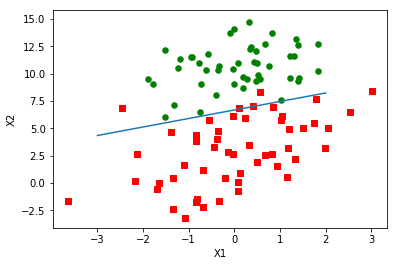

In [6]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1=[];ycord1 = []
    xcord2=[];ycord2 = []
    for i in range(n):
        if int(labelMat[i])==1:
            xcord1.append(dataArr[i,1]);ycord1.append(dataArr[i,2]);
        else:
            xcord2.append(dataArr[i,1]);ycord2.append(dataArr[i,2]);
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c='red',marker = 's')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    x = arange(-3.0,3.0,1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel('X1');plt.ylabel('X2')
    plt.show()
    
plotBestFit(weights.getA())

####  所有回归系数初始化为1
####  对数据集中每个样本
#### &emsp;&emsp; &emsp;&emsp; 计算该样本的梯度
#### &emsp;&emsp; &emsp;&emsp; 使用alpha * gradient更新回归系数的向量
#### 返回回归系数值

### 程序清单5-3 随机梯度上升算法

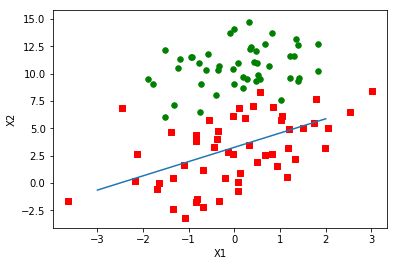

In [22]:
def stocGradAscent0(dataMatrix,classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.1
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i]-h
        weights = weights + alpha * error * dataMatrix[i]
    return weights
    
dataArr,labelMat = loadDataSet()
weights=stocGradAscent0(array(dataArr),labelMat)
plotBestFit(weights)

### 程序清单5-4 改进的随机梯度上升算法

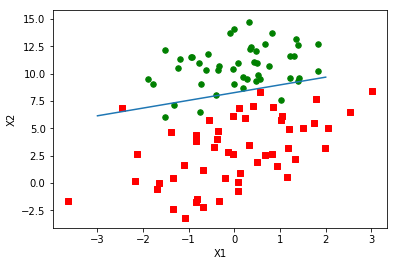

In [23]:
def stocGradAscent1(dataMatrix,classLabels,numIter=150):
    m,n = shape(dataMatrix)    
    weights = ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        #print(dataIndex)
        for i in range(m):
            alpha = 4/(0.1+j+i)+0.01 
            #学习率每次迭代时不断变化减小,alpha会随着迭代次数不断减少，但不会减小到0。
            #随机选取样本的方法可以减少周期的波动。
            randIndex = int(random.uniform(0,len(dataIndex)))
            #uniform(x,y) 方法将随机生成下一个实数，它在[x,y]范围内。
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex]-h
            weights = weights + alpha * error * dataMatrix[randIndex]
            #del(dataIndex[randIndex])
            del(list(dataIndex)[randIndex])
    return weights
    
dataArr,labelMat = loadDataSet()
weights=stocGradAscent1(array(dataArr),labelMat)
plotBestFit(weights)

### 从疝气病症预测病马的死亡率

###  程序清单5-5 Logistic回归分类函数

In [31]:
def  classifyVector(inX,weights):
    prob = sigmoid(sum(inX * weights))
    if prob>0.5: return 1.0
    else: return 0.0


In [32]:
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet),trainingLabels,500)
    errorCount = 0;
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr=[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr),trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print("the error rate of this test is:%f" % errorRate)
    return errorRate


In [33]:
def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d itertaions the average error rate is : %f" % (numTests,errorSum/float(numTests)))

In [34]:
multiTest()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


the error rate of this test is:0.477612
the error rate of this test is:0.328358
the error rate of this test is:0.611940
the error rate of this test is:0.283582
the error rate of this test is:0.283582
the error rate of this test is:0.253731
the error rate of this test is:0.283582
the error rate of this test is:0.283582
the error rate of this test is:0.283582
the error rate of this test is:0.298507
after 10 itertaions the average error rate is : 0.338806
